In [1]:
!conda install python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



## Writers degree

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.model_selection import train_test_split #az adatokat ezzel válasszuk szét train és test adatokra
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #metrics for accuracy calculation

## Application of KMeans to WRITERS

In [3]:
df=pd.read_excel('writers_statistics.xlsx', sheet_name="database")
df.head(5)

,ID,Label,Tag,Modularity class,Degree,Weighted Degree,Eccentricity,Closness centrality,Betweeness centrality,Authority,Hub,PageRanks
0,30,Ágopcsa Marianna,i,7,3,3,5,0.371947,30.576590,0.017899,0.017903,0.000347
1,69,András János,i,8,3,7,5,0.337769,13.196369,0.007190,0.007191,0.000343
2,77,Aniszi Kálmán,i,0,5,5,5,0.396725,25.114973,0.030661,0.030668,0.000471
3,80,Antal Árpád,i,11,5,5,5,0.398356,38.931670,0.032283,0.032290,0.000492
4,85,Antal Márk,szi,0,6,6,5,0.383178,160.422990,0.019606,0.019608,0.000552


In [4]:
df.columns

Index(['ID', 'Label', 'Tag', 'Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks'],
      dtype='object')

In [5]:
d=df[['Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks']].T.to_dict()

In [6]:
X_writers=np.array([list(d[i].values()) for i in d])

In [7]:
X_writers.shape

(816, 9)

In [8]:
d=df[['ID']].T.to_dict()
y_writers=np.array([list(d[i].values()) for i in d])

In [9]:
y_writers.shape

(816, 1)

In [10]:
d=df[['Label']].T.to_dict()
y_labels=np.array([list(d[i].values()) for i in d])

In [11]:
y_labels.shape

(816, 1)

In [12]:
d=df[['Tag']].T.to_dict()
y_tags=np.array([list(d[i].values()) for i in d])

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
est = KMeans(n_clusters=4)
clusters = est.fit_predict(X_writers)
est.cluster_centers_.shape

(4, 9)

In [15]:
for i in range(4):
    print(est.cluster_centers_[i])

[4.60869565e+00 1.38913043e+01 2.59673913e+01 4.76086957e+00
 3.95065196e-01 1.11838696e+03 3.03011739e-02 3.03057609e-02
 1.14401087e-03]
[4.66666667e+00 2.70555556e+01 5.75555556e+01 4.44444444e+00
 4.35129056e-01 3.03328349e+03 5.56276667e-02 5.56344444e-02
 2.01922222e-03]
[5.00143062e+00 5.98283262e+00 9.63233190e+00 4.96852647e+00
 3.62128711e-01 1.62532064e+02 1.65933605e-02 1.65963276e-02
 5.63659514e-04]
[3.42857143e+00 4.68571429e+01 8.70000000e+01 4.28571429e+00
 4.35847714e-01 7.44400976e+03 6.36958571e-02 6.36995714e-02
 3.63200000e-03]


In [16]:
df['clusters']=clusters

In [17]:
clusters

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,

In [18]:
df.head(3)

,ID,Label,Tag,Modularity class,Degree,Weighted Degree,Eccentricity,Closness centrality,Betweeness centrality,Authority,Hub,PageRanks,clusters
0,30,Ágopcsa Marianna,i,7,3,3,5,0.371947,30.576590,0.017899,0.017903,0.000347,2
1,69,András János,i,8,3,7,5,0.337769,13.196369,0.007190,0.007191,0.000343,2
2,77,Aniszi Kálmán,i,0,5,5,5,0.396725,25.114973,0.030661,0.030668,0.000471,2


In [19]:
df.groupby('clusters').count()['Tag']

clusters
0     92
1     18
2    699
3      7
Name: Tag, dtype: int64

In [20]:
for i in df.sort_values(by='clusters')[['clusters','Label']].T.iteritems():
    print(i[1][0], i[1][1])

0 Zsolt Béla
0 Csehi Gyula
0 Korvin Sándor
0 Oláh István
0 Kormos Gyula
0 Korda István
0 Mózes Huba
0 Olosz Lajos
0 Láng Gusztáv
0 Szekernyés János
0 Cseke Péter
0 Székely János
0 Szász János
0 László Ferenc
0 László Ferenc
0 Osvát Kálmán
0 Szász Endre
0 Venczel József
0 László Tihamér
0 Nagy-Tóth Ferenc
0 Szabó T. [Törpényi] Attila
0 Gábor István
0 Berde Mária
0 Kós Károly
0 Nagy Géza, ifjabb
0 Dimény István
0 Tófalvi Zoltán
0 Tomcsa Sándor
0 Tavaszy Sándor
0 Dsida Jenő
0 Kovács János
0 Engel Károly
0 Krenner Miklós
0 Kovács György
0 Csetri Elek
0 Kovács Dezső
0 Nagy István
0 Szombati-Szabó István
0 Tóth Sándor
0 Dávid Gyula
0 Faragó József
0 Tulogdy János
0 Turnowsky Sándor
0 Kubán Endre, ifjabb
0 Kulcsár Sándor
0 Szövérdi Ferenc
0 Berde Amál
0 Szabolcska Mihály
0 Pakocs
0 Lászlóffy Aladár
0 Balázs Sándor
0 Herczka István
0 Márki Zoltán
0 Balázs Ferenc
0 Józsa Béla
0 Schiff Béla
0 Jordáky Lajos
0 Horváth István
0 Ráduly János
0 Salamon László
0 Imreh István
0 Marosi Péter
0 Zörgő Ben

## Application of Decision Tree to WRITERS

In [21]:
feature_cols = list(df.columns.values[6:])[:-1]
X_writers = df[feature_cols]

In [22]:
feature_cols

['Eccentricity',
 'Closness centrality',
 'Betweeness centrality',
 'Authority',
 'Hub',
 'PageRanks']

In [23]:
X_writers.head()

,Eccentricity,Closness centrality,Betweeness centrality,Authority,Hub,PageRanks
0,5,0.371947,30.576590,0.017899,0.017903,0.000347
1,5,0.337769,13.196369,0.007190,0.007191,0.000343
2,5,0.396725,25.114973,0.030661,0.030668,0.000471
3,5,0.398356,38.931670,0.032283,0.032290,0.000492
4,5,0.383178,160.422990,0.019606,0.019608,0.000552


In [24]:
#target vector
y = df.Degree

In [25]:
y

0       3
1       3
2       5
3       5
4       6
       ..
811     4
812     3
813     9
814     5
815    10
Name: Degree, Length: 816, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_writers, y, test_size=0.2, random_state=32)

In [27]:
classifier = DecisionTreeClassifier() #creating classifer object 

classifier = classifier.fit(X_train,y_train) #training

y_pred = classifier.predict(X_test) #predicting using the test dataset

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.823170731707317


In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
#,class_names=['0','1']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
                                                                                 '19','20','21','22','23','24','25','26','28','29','30','31','32','35','36','37',
                                                                                  '39','40','41','44','52','59','61'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('writers_degree.png')
Image(graph.create_png())

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [30]:
max_depth = 3
#creating classifer object, setting maximum depth
simpler_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

simpler_classifier = simpler_classifier.fit(X_train,y_train) #training 

y_pred = simpler_classifier.predict(X_test) #predicting

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6158536585365854


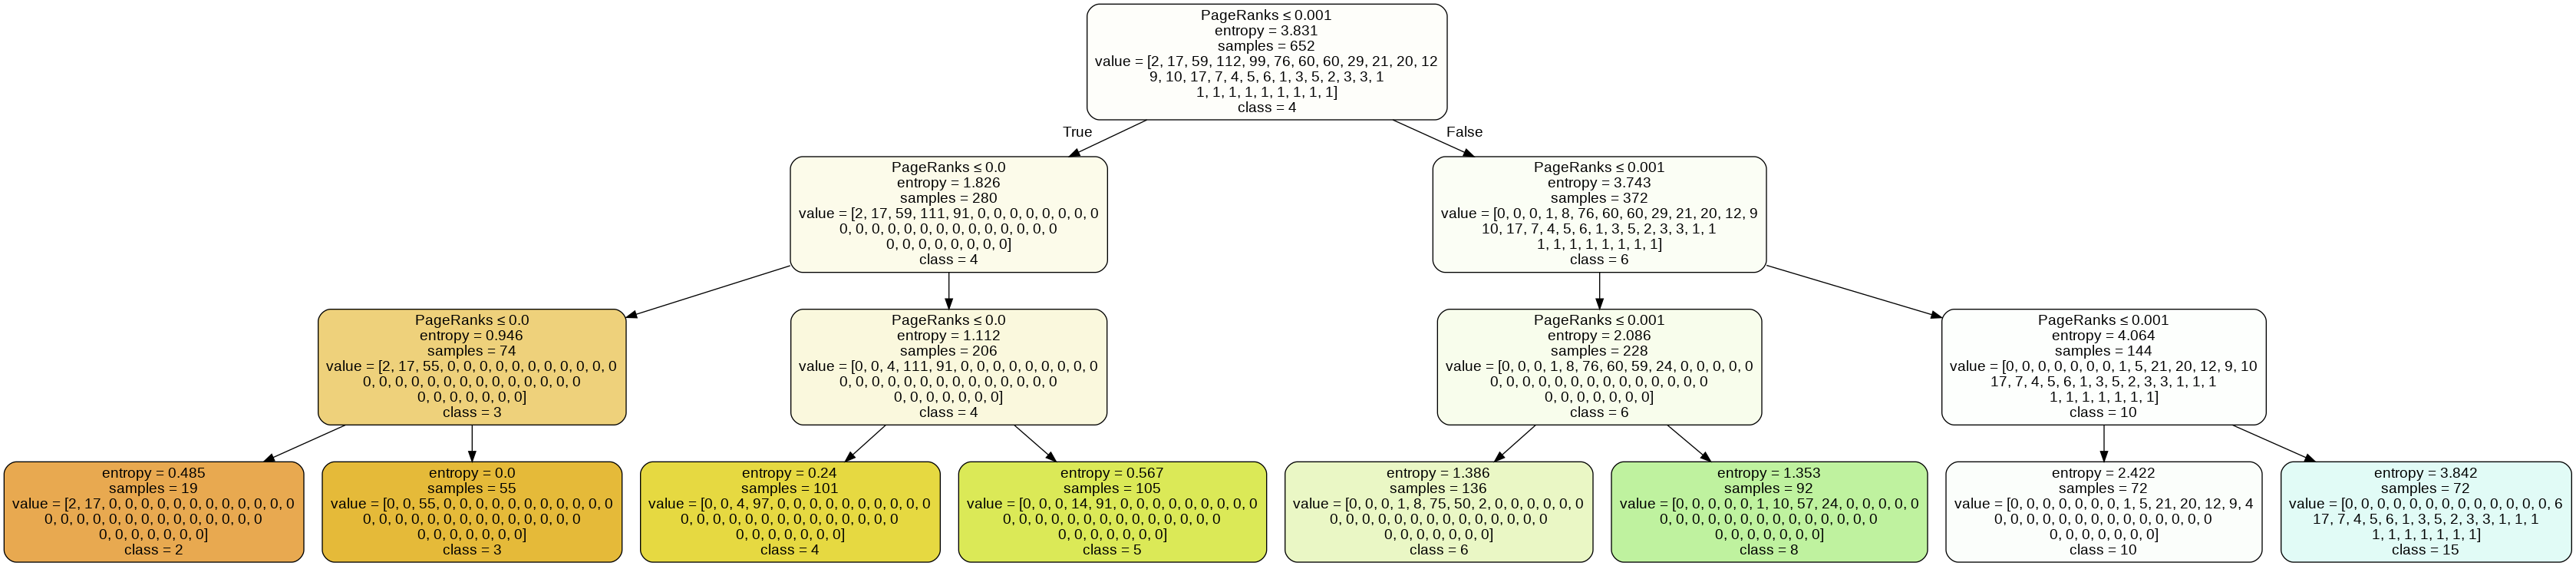

In [31]:
dot_data = StringIO()
export_graphviz(simpler_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
                                                                                 '19','20','21','22','23','24','25','26','28','29','30','31','32','35','36','37',
                                                                                  '39','40','41','44','52','59','61'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('writers_maxdepth' + str(max_depth) + '.png')
Image(graph.create_png())